In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
df = pd.read_json('alert_data.json')
df.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [3]:
df.tail()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9997,OpsRamp agent is offline,Ok,2,P0,1140,Compute,Operating System,Connectivity,Opsramp Cloud Connectivity,False
9998,[Cleared] cca02ris001.cc.nwncloud.com: cca02ri...,Ok,2,P0,58,Others,Others,Others,Others,True
9999,[Cleared] PSCPVLFIN1A12.NWNCC.LOCAL: PSCPVLFIN...,Ok,2,P0,58,Others,Others,Others,Others,True


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(10000, 10)

In [6]:
df.dtypes

subject             object
currentState        object
repeatCount          int64
priority            object
healTime             int64
alertClass          object
alertSubClass       object
alertCategory       object
alertSubCategory    object
alert_autoheal        bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [8]:
# Checking for null values
df.isnull().sum()

subject             0
currentState        0
repeatCount         0
priority            0
healTime            0
alertClass          0
alertSubClass       0
alertCategory       0
alertSubCategory    0
alert_autoheal      0
dtype: int64

In [9]:
# Count of duplicated rows
df[df.duplicated()]

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
17,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
18,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
20,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
22,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
29,CPU Usage is 100.0%.,Ok,2,P2,600,Compute,Operating System,Device Health,CPU,True
...,...,...,...,...,...,...,...,...,...,...
9993,Attenuated Alert: FORTINET-FORTIGATE-MIB::fgTr...,Ok,3,P1,480,Network,Wireless,Device Status,AP Down,True
9994,[Cleared] hcs-west-emc-storage-monitor: We are...,Ok,2,P2,18,Others,Others,Others,Others,True
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True


In [10]:
df.drop_duplicates(keep = 'first', inplace= True)

In [11]:
df.shape

(5238, 10)

In [12]:
df = df.drop(columns=['currentState'])

In [13]:
df.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [14]:
# Check for value counts
df['priority'].value_counts()

P1    2323
P2    1627
P0     962
P3     326
Name: priority, dtype: int64

In [15]:
df['alertClass'].value_counts()

Network          1671
Others           1575
Compute           962
Application       657
Environment       109
Data              105
Cloud              54
Communication      53
Tools              52
Name: alertClass, dtype: int64

In [16]:
df['alertSubClass'].value_counts()

Others                     1575
Operating System            765
Switch                      749
Web Service                 366
Wireless                    342
Firewall                    316
Third Party Application     243
Router                      218
Virtualization              189
Power                       109
Infra Application            77
Monitoring                   75
Backup                       52
Voice                        51
Database                     35
Generic Device               30
Storage                      18
SDWAN                        14
Hardware                      8
Cloud Instance                4
Collaboration                 2
Name: alertSubClass, dtype: int64

In [17]:
df['alertCategory'].value_counts()

Others                1575
Device Status         1138
Device Health          814
Application Health     638
Connectivity           511
Network Interface      303
Application Status     226
Device Management       30
VOIP Link                2
Resource Status          1
Name: alertCategory, dtype: int64

In [18]:
df['alertSubCategory'].value_counts()

Others                             1575
Device Down                         652
Monitoring Failure                  310
CPU                                 252
Third Party Application Service     243
                                   ... 
Management Connectivity               1
Resource Down                         1
High Availability                     1
Exchange - Mailflow                   1
Opsramp Gateway Status                1
Name: alertSubCategory, Length: 69, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
cols = ['subject', 'priority', 'alertClass', 'alertSubClass', 'alertCategory','alertSubCategory', "alert_autoheal"]

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,2,3,60,6,20,5,2,1
1,376,2,0,60,6,4,5,18,1
2,376,2,0,180,3,17,5,18,1
3,1987,2,1,240,6,15,2,38,1
4,376,2,0,59,3,9,5,18,1


In [21]:
# assigning the independent features to X and the target variable to y
X = df.drop(columns = ['alert_autoheal'])
y = df['alert_autoheal']

In [22]:
X.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,60,6,20,5,2
1,376,2,0,60,6,4,5,18
2,376,2,0,180,3,17,5,18
3,1987,2,1,240,6,15,2,38
4,376,2,0,59,3,9,5,18


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: alert_autoheal, dtype: int64

# Split the dataset into Training and Testing datasets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [26]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (3666, 8)
Shape of testing data: (1572, 8)


In [27]:
X_train.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
9497,3394,2,2,300,1,19,0,32
8339,1200,2,2,240,8,8,5,41
7045,1219,2,1,900,6,4,2,48
5302,1778,2,1,120,0,19,1,67
7095,124,2,1,360,0,19,1,67


In [28]:
clf= KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy : 0.96
Other Metrics:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       345
           1       0.96      0.99      0.98      1227

    accuracy                           0.96      1572
   macro avg       0.96      0.93      0.94      1572
weighted avg       0.96      0.96      0.96      1572



In [29]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alert_autoheal,,
0,301,44
1,16,1211


# Data Balancing

In [30]:
df['alert_autoheal'].value_counts()

1    4113
0    1125
Name: alert_autoheal, dtype: int64

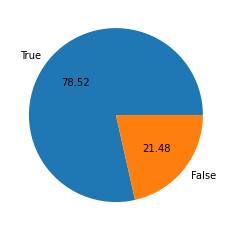

In [31]:
plt.pie(df['alert_autoheal'].value_counts(),labels=['True','False'],autopct='%0.2f')
plt.show()

Since the target variable is highly imbalanced, we will balance it using smote technique

In [32]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN()

In [33]:
X1, y1 = smote.fit_resample(X.astype('float'), y)

/home/ubuntu/.local/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:731: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(X_class[nn_indices[samples_indices]], axis=1).mode, axis=1


In [34]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=0.3,random_state=42)
print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (5758, 8)
Shape of testing data: (2468, 8)


In [35]:
len(X_train), len(X_test)

(5758, 2468)

In [36]:
from collections import Counter
print("Before Smote: ", Counter(y))
print("After Smote: ", Counter(y1))

Before Smote:  Counter({1: 4113, 0: 1125})
After Smote:  Counter({1: 4113, 0: 4113})


In [37]:
clf= KNeighborsClassifier()
clf.fit(X1,y1)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred)

Accuracy : 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1240
           1       0.98      0.98      0.98      1228

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468



col_0,0,1
alert_autoheal,,
0,1221,19
1,27,1201


## Model Building

## KNeighbors Classifier

In [38]:
clf= KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred)

Accuracy : 0.97
Other Metrics:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1240
           1       0.98      0.97      0.97      1228

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468



col_0,0,1
alert_autoheal,,
0,1210,30
1,38,1190


In [39]:
print("R2 Score is: ",r2_score(y_test, y_pred))

R2 Score is:  0.8897866974887044


## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred)

Accuracy : 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1240
           1       0.98      0.97      0.98      1228

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468



/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
alert_autoheal,,
0,1221,19
1,32,1196


In [41]:
print("R2 Score is: ",r2_score(y_test, y_pred))

R2 Score is:  0.9173400231165283


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred)

Accuracy : 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00      1228

    accuracy                           1.00      2468
   macro avg       1.00      1.00      1.00      2468
weighted avg       1.00      1.00      1.00      2468



col_0,0,1
alert_autoheal,,
0,1240,0
1,0,1228


In [44]:
print("R2 Score is: ",r2_score(y_test, y_pred))

R2 Score is:  1.0


## Support Vector Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
clf3 = SVC()
clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred)

Accuracy : 0.91
Other Metrics:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1240
           1       0.88      0.94      0.91      1228

    accuracy                           0.91      2468
   macro avg       0.91      0.91      0.91      2468
weighted avg       0.91      0.91      0.91      2468



col_0,0,1
alert_autoheal,,
0,1088,152
1,69,1159


In [47]:
print("R2 Score is: ",r2_score(y_test, y_pred))

R2 Score is:  0.6418067668382894


# Regression

<AxesSubplot: >

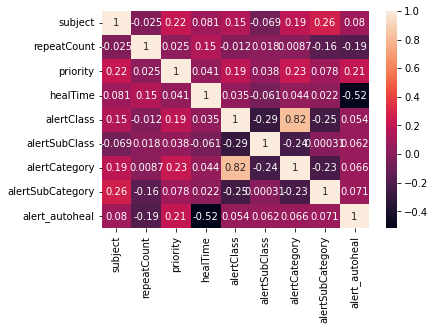

In [48]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [49]:
X1.shape, y1.shape

((8226, 8), (8226,))

In [50]:
smote = pd.concat([X1, y1], axis=1)
smote.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [51]:
smote.shape

(8226, 9)

<AxesSubplot: >

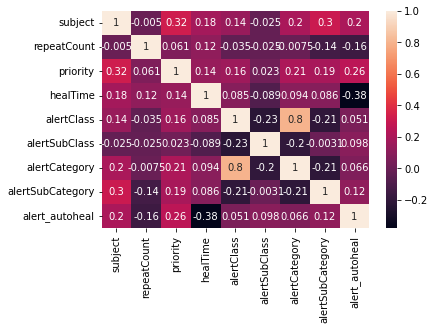

In [52]:
import seaborn as sns
sns.heatmap(smote.corr(), annot=True)

In [53]:
smote.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [54]:
X = smote.drop(["healTime"],axis=1)
y = smote["healTime"]

In [55]:
X.head()

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,3.0,9.0,5.0,18.0,1


In [56]:
X.shape, y.shape

((8226, 8), (8226,))

In [57]:
y.head()

0     60.0
1     60.0
2    180.0
3    240.0
4     59.0
Name: healTime, dtype: float64

# Ordinary Least Square Method

In [58]:
# OLS method
import statsmodels.formula.api as smf

In [59]:
import statsmodels.formula.api as smf
model = smf.ols("y~X", data = smote).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     352.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:33:14   Log-Likelihood:                -86900.
No. Observations:                8226   AIC:                         1.738e+05
Df Residuals:                    8217   BIC:                         1.739e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    636.3970    619.662      1.027      0.304    -578.297    1851.091
X[0]           2.0368      0.117     17.478      0.000       1.808       2.265
X[1]         635.5042    140.976      4.508      0.000     359.156     911.852
X[2]        2159.6689    136.751     15.793      0.000    1891.602    2427.736
X[3]         195.9788     74.022      2.648      0.008      50.878     341.080
X[4]         -60.6439     23.814     -2.547      0.011    -107.325     -13.963
X[5]         135.0450     74.509      1.812      0.070     -11.012     281.102
X[6]          47.2797      6.969      6.784      0.000      33.619      60.940
X[7]       -1.012e+04    220.398    -45.934      0.000   -1.06e+04   -9691.647
==============================================================================
Omnibus:                     5759.124   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80712.994
Skew:                           3.290   Prob(JB):                         0.00
Kurtosis:                      16.864   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Variation Inflation Factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def calc_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [63]:
smote.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [64]:
df1 = smote.drop(columns=['healTime'])
df1

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,3.0,9.0,5.0,18.0,1
...,...,...,...,...,...,...,...,...
8221,819.0,2.0,1.0,7.0,10.0,7.0,42.0,0
8222,2935.0,2.0,2.0,7.0,10.0,7.0,42.0,0
8223,1383.0,3.0,0.0,6.0,20.0,5.0,2.0,0
8224,1569.0,2.0,0.0,3.0,9.0,2.0,40.0,0


In [65]:
features = df1.iloc[:,:]
calc_vif(features)

,features,VIF_Value
0,subject,4.024557
1,repeatCount,6.629480
2,priority,3.447545
3,alertClass,13.336350
4,alertSubClass,5.695182
5,alertCategory,11.979849
6,alertSubCategory,4.886118
7,alert_autoheal,2.240046


In [66]:
smote.corr()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
subject,1.000000,-0.004984,0.323035,0.182366,0.141858,-0.024708,0.197923,0.303774,0.202728
repeatCount,-0.004984,1.000000,0.061070,0.117101,-0.034657,-0.024762,-0.007454,-0.136278,-0.159691
priority,0.323035,0.061070,1.000000,0.138229,0.159081,0.022603,0.207612,0.193121,0.256145
healTime,0.182366,0.117101,0.138229,1.000000,0.084531,-0.088763,0.093543,0.085922,-0.381766
alertClass,0.141858,-0.034657,0.159081,0.084531,1.000000,-0.229691,0.796486,-0.205013,0.050718
alertSubClass,-0.024708,-0.024762,0.022603,-0.088763,-0.229691,1.000000,-0.202402,-0.003052,0.098134
alertCategory,0.197923,-0.007454,0.207612,0.093543,0.796486,-0.202402,1.000000,-0.213393,0.065718
alertSubCategory,0.303774,-0.136278,0.193121,0.085922,-0.205013,-0.003052,-0.213393,1.000000,0.120086
alert_autoheal,0.202728,-0.159691,0.256145,-0.381766,0.050718,0.098134,0.065718,0.120086,1.000000


In [67]:
df = smote.drop(columns = ['alertClass'])
df.head()

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,9.0,5.0,18.0,1


In [68]:
df2 = df.drop(columns=['healTime'])
df2

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,9.0,5.0,18.0,1
...,...,...,...,...,...,...,...
8221,819.0,2.0,1.0,10.0,7.0,42.0,0
8222,2935.0,2.0,2.0,10.0,7.0,42.0,0
8223,1383.0,3.0,0.0,20.0,5.0,2.0,0
8224,1569.0,2.0,0.0,9.0,2.0,40.0,0


In [69]:
features = df2.iloc[:,:]
calc_vif(features)

,features,VIF_Value
0,subject,4.024379
1,repeatCount,6.449250
2,priority,3.447526
3,alertSubClass,5.674954
4,alertCategory,3.901698
5,alertSubCategory,4.843347
6,alert_autoheal,2.235080


In [70]:
df.head()

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,9.0,5.0,18.0,1


In [71]:
# assigning the independent features to X and the target variable to y
X_final = df.drop(columns = ['healTime'])
y_final = df['healTime']

In [72]:
X_final.head()

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,9.0,5.0,18.0,1


In [73]:
X_final.shape, y_final.shape

((8226, 7), (8226,))

In [74]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X_final,y_final,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (5758, 7)
Shape of testing data: (2468, 7)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [76]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [77]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.24329089182939978


In [78]:
clf1 = Lasso(alpha=0.001)
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.243290889293992


In [79]:
clf2 = Ridge(alpha=10)
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))


R2 score:  0.24329957884469944


In [80]:
clf3 = KNeighborsRegressor(n_neighbors=3)
clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8153334185584769


In [81]:
clf4 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.3548968011049459


In [82]:
clf5 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
clf5.fit(X_train,y_train)
y_pred = clf5.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8905390195833314


In [83]:
clf6 = DecisionTreeRegressor(max_depth=8)
clf6.fit(X_train,y_train)
y_pred = clf6.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8551415646832756


In [84]:
from sklearn.svm import SVR
clf7 = SVR(kernel='rbf',C=10000,epsilon=0.1)
clf7.fit(X_train,y_train)
y_pred = clf7.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))


R2 score:  -0.09633734147103423


In [85]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [86]:
model = smf.quantreg('healTime ~ subject+repeatCount+priority+alertSubClass+alertCategory+alertSubCategory+alert_autoheal', df)
res = model.fit(q = 0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               healTime   Pseudo R-squared:               0.2095
Model:                       QuantReg   Bandwidth:                       223.0
Method:                 Least Squares   Sparsity:                        1937.
Date:                Fri, 14 Apr 2023   No. Observations:                 8226
Time:                        11:33:18   Df Residuals:                     8218
                                        Df Model:                            7
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3357.8933     61.035     55.016      0.000    3238.249    3477.538
subject              0.0672      0.012      5.584      0.000       0.044       0.091
repeatCount        108.8251     14.542      7.484      0.000      80.320     137.330
priority           255

In [87]:
model = smf.ols('healTime ~ subject+repeatCount+priority+alertSubClass+alertCategory+alertSubCategory+alert_autoheal', df).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               healTime   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     401.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:33:19   Log-Likelihood:                -86903.
No. Observations:                8226   AIC:                         1.738e+05
Df Residuals:                    8218   BIC:                         1.739e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1132.6616    590.849      1.917      0.055     -25.551    2290.874
subject              2.0357      0.117     17.462      0.000       1.807       2.264
repeatCount        612.8933    140.768      4.354      0.000     336.952     888.835
priority          2166.5169    136.777     15.840      0.000    1898.400    2434.634
alertSubClass      -68.3652     23.643     -2.892      0.004    -114.712     -22.018
alertCategory      283.7850     48.962      5.796      0.000     187.807     379.763
alertSubCategory    45.9527      6.953      6.609      0.000      32.322      59.583
alert_autoheal   -1.012e+04    220.472    -45.898      0.000   -1.06e+04   -9687.055
==============================================================================
Omnibus:                     5753.764   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80427.044
Skew:                           3.286   Prob(JB):                         0.00
Kurtosis:                      16.837   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
df

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,9.0,5.0,18.0,1
...,...,...,...,...,...,...,...,...
8221,819.0,2.0,1.0,4440.0,10.0,7.0,42.0,0
8222,2935.0,2.0,2.0,53820.0,10.0,7.0,42.0,0
8223,1383.0,3.0,0.0,3420.0,20.0,5.0,2.0,0
8224,1569.0,2.0,0.0,1140.0,9.0,2.0,40.0,0


In [90]:
from lightgbm import LGBMRegressor

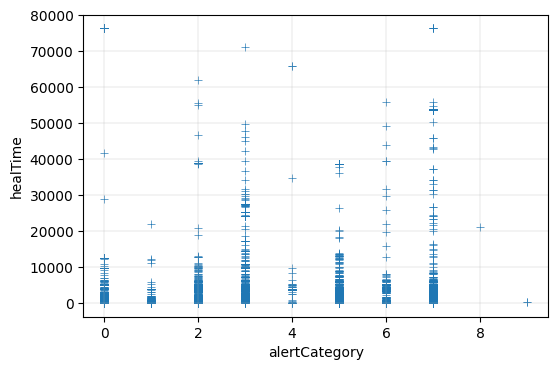

In [91]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data = df, x = "alertCategory", y = "healTime", marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [92]:
acc = []
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds, 'Accuracy': acc}

In [93]:
print(classifiers['0.1']['Accuracy'])
print(classifiers['0.5']['Accuracy'])
print(classifiers['0.9']['Accuracy'])

[0.057905221511955984, 0.7394556911866368, 0.7866855294669219]
[0.057905221511955984, 0.7394556911866368, 0.7866855294669219]
[0.057905221511955984, 0.7394556911866368, 0.7866855294669219]


In [94]:
data = pd.DataFrame({'0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'healTime': y_test.reset_index()['healTime']})

In [95]:
data

,0.1,0.5,0.9,healTime
0,301.586493,2235.978233,1785.162618,600.0
1,50.378226,242.967627,796.293461,59.0
2,206.916297,485.287796,2052.452462,1080.0
3,2428.511678,3958.792055,5408.650638,6180.0
4,23.836252,309.901463,699.588689,22.0
...,...,...,...,...
2463,2656.291431,3030.676328,10082.533129,2640.0
2464,1101.761960,4064.486071,5484.333396,2100.0
2465,1864.068916,2389.248460,3960.344043,1860.0
2466,372.921662,583.960176,1958.153163,300.0


In [96]:
melted_data = pd.melt(data, id_vars=['healTime'])
melted_data

,healTime,variable,value
0,600.0,0.1,301.586493
1,59.0,0.1,50.378226
2,1080.0,0.1,206.916297
3,6180.0,0.1,2428.511678
4,22.0,0.1,23.836252
...,...,...,...
7399,2640.0,0.9,10082.533129
7400,2100.0,0.9,5484.333396
7401,1860.0,0.9,3960.344043
7402,300.0,0.9,1958.153163


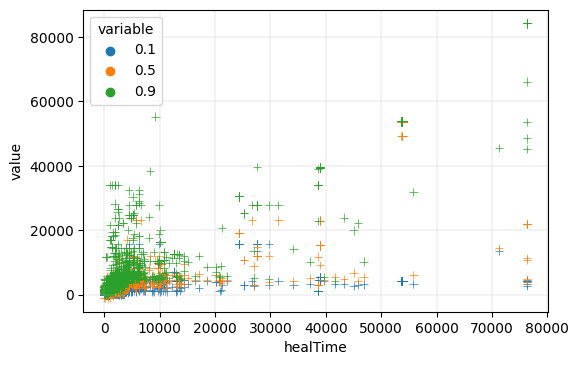

In [97]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=melted_data, 
                x='healTime',
                y='value',
                hue='variable',
                hue_order=['0.1', '0.5', '0.9'],
                marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [98]:
from numpy import asarray
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2023-04-14 11:33:20.712037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 11:33:20.864671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-14 11:33:20.864698: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-14 11:33:21.537963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [99]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X_final,y_final,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (5758, 7)
Shape of testing data: (2468, 7)


In [105]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
# define and fit the model
def fit_model(X_train, y_train):
# define neural network model 
    features = X_train.shape[1]
    model = Sequential()
    model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=features))
    model.add(Dense(5, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(1))
 # compile the model and specify loss and optimizer
    opt = Adam(learning_rate=0.01, beta_1=0.85, beta_2=0.999)
    model.compile(optimizer=opt, loss='mse')
 # fit the model on the training dataset
    model.fit(X_train, y_train, verbose=0, epochs=300, batch_size=16)
    return model

In [102]:
# fit an ensemble of models
def fit_ensemble(n_members, X_train, X_test, y_train, y_test):
    ensemble = list()
    for i in range(n_members):        
# define and fit the model on the training set
        model = fit_model(X_train, y_train)
# evaluate model on the test set
        yhat = model.predict(X_test, verbose=0)
        mae = mean_absolute_error(y_test, yhat)
        print('>%d, MAE: %.3f' % (i+1, mae))
 # store the model
        ensemble.append(model)
        return ensemble

In [103]:
# make predictions with the ensemble and calculate a prediction interval
def predict_with_pi(ensemble, X):
 # make predictions
    yhat = [model.predict(X, verbose=0) for model in ensemble]
    yhat = asarray(yhat)
 # calculate 95% gaussian prediction interval
    interval = 1.96 * yhat.std()
    lower, upper = yhat.mean() - interval, yhat.mean() + interval
    return lower, yhat.mean(), upper

In [104]:
# fit ensemble
n_members = 30
ensemble = fit_ensemble(n_members, X_train, X_test, y_train, y_test)
# make predictions with prediction interval
newX = asarray([X_test[0, :]])
lower, mean, upper = predict_with_pi(ensemble, newX)
print('Point prediction: %.3f' % mean)
print('95%% prediction interval: [%.3f, %.3f]' % (lower, upper))
print('True value: %.3f' % y_test[0])

2023-04-14 11:33:22.327333: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-14 11:33:22.327367: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-14 11:33:22.327402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-Zako): /proc/driver/nvidia/version does not exist
2023-04-14 11:33:22.327659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


>1, MAE: 3185.573
Point prediction: 791.356
95% prediction interval: [791.356, 791.356]
True value: 60.000
